In [23]:
using Logging
include("driver.jl")
include("visual.jl")

Logging.disable_logging(Logging.Warn);

LogLevel(1001)

Plots.AnimatedGif("C:\\Users\\ryara\\AppData\\Local\\Temp\\jl_vQrALoFcX0.gif")
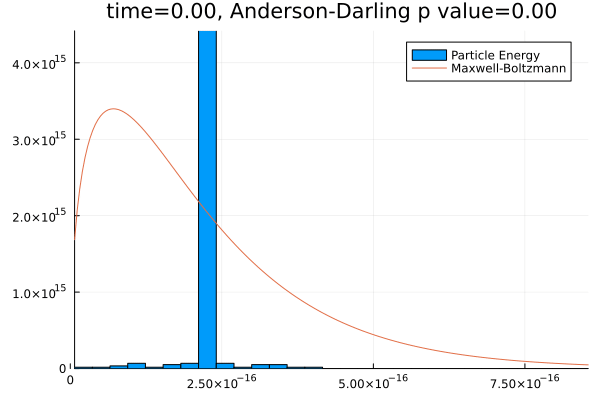

In [24]:
#Test 1 - Simple Argon gas
L = (1.e-6, 1.e-6, 1.e-6)
Ncell = (20, 1, 1)
sys = System(L, Ncell, argon, 1.78, 2000, 400.)
samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)
plot_thermalization(samp)